# **SALES PREDICTION USING PYTHON**

dataset link:https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression

### **Importing the libraries**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### **Loading the Dataset**

In [28]:
data = pd.read_csv(r'/content/advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### **Data Cleaning and Preprocessing**

In [29]:
data.shape

(200, 4)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [31]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [32]:
data.isnull().sum()*100/data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

### **Checking the Outliers**

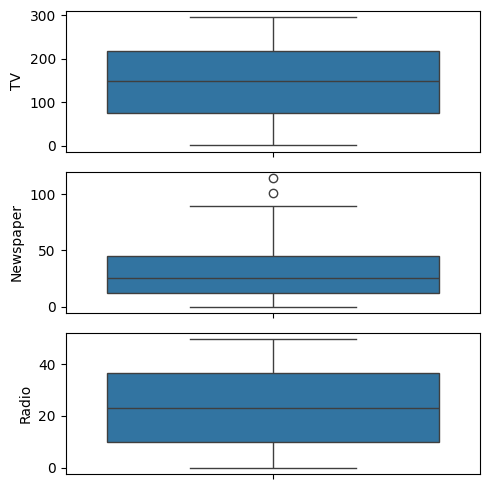

In [33]:
fig, axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(data['TV'], ax =axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax= axs[2])
plt.tight_layout()

### **Exploratory Data Analysis**

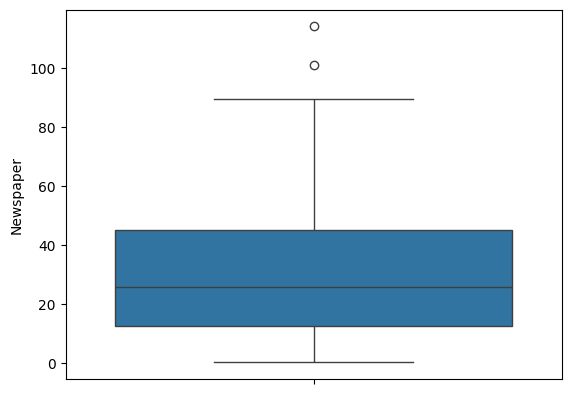

In [34]:
sns.boxplot(data['Newspaper'])
plt.show()

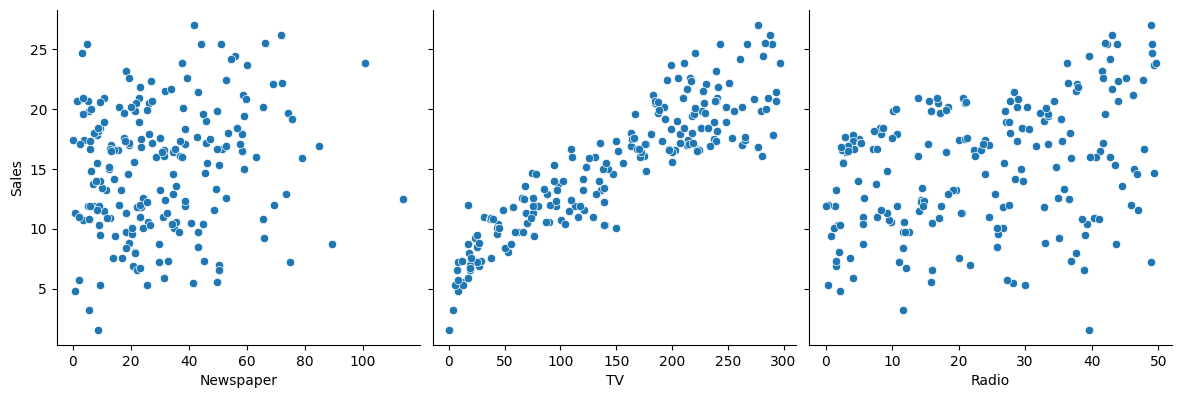

In [35]:
sns.pairplot(data, x_vars = ['Newspaper', 'TV', 'Radio'], y_vars ='Sales' , height=4, aspect=1, kind = 'scatter')
plt.show()

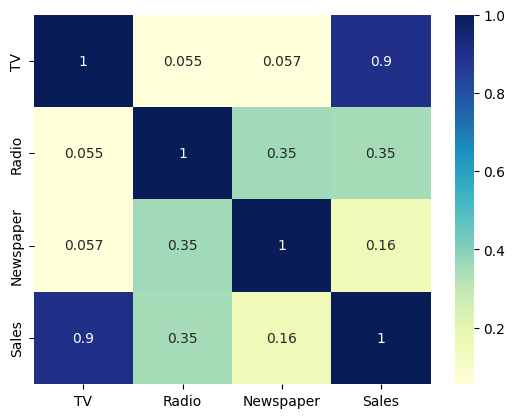

In [37]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

### **Model Building**

In [38]:
x = data['TV']
Y = data['Sales']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.3, random_state=100)

In [43]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [44]:
Y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [52]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(Y_train, x_train_sm).fit()

In [53]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [55]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.52e-52
Time:                        09:49:24   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

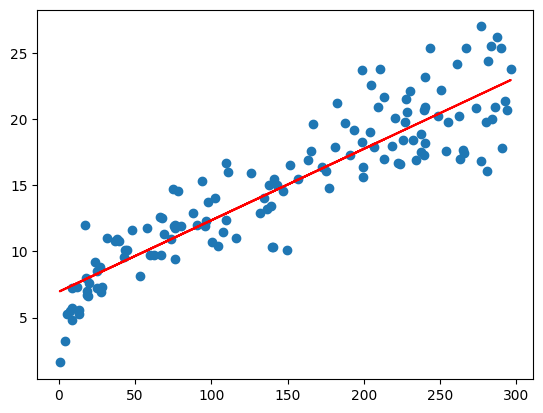

In [57]:
plt.scatter(x_train, Y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()


### **Model Evaluation**

In [59]:
pred = lr.predict(x_train_sm)
res = (Y_train - pred)
pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

<ipython-input-61-df4a9eabff86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


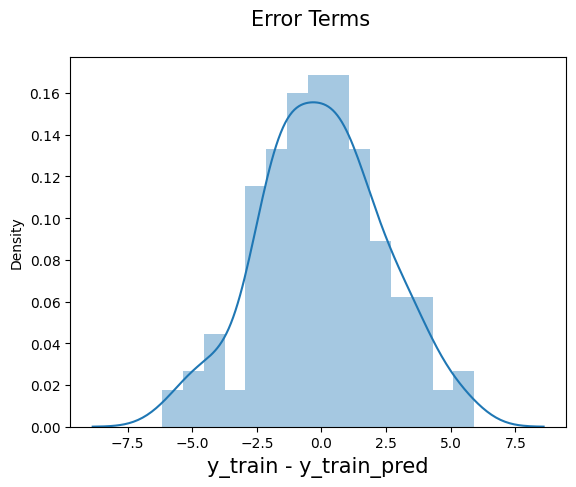

In [61]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

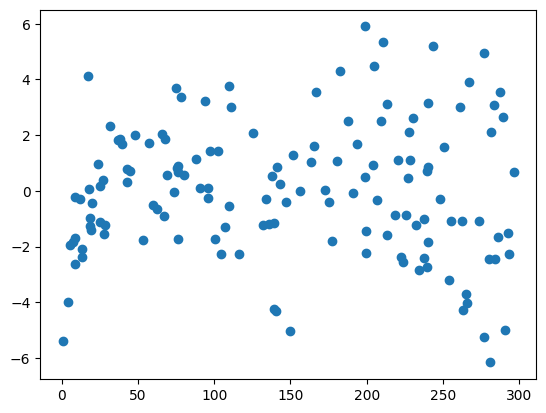

In [62]:
plt.scatter(x_train, res)
plt.show()

In [64]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [67]:
from sklearn.metrics import mean_squared_error , r2_score
print("The Mean Squared error :" ,np.sqrt(mean_squared_error(Y_test,y_pred)))
print("The R2 score is :" ,r2_score(Y_test,y_pred) )

The Mean Squared error : 2.019296008966232
The R2 score is : 0.792103160124566


<function matplotlib.pyplot.show(close=None, block=None)>

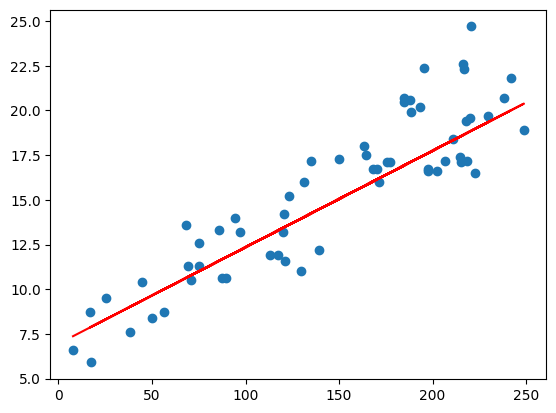

In [71]:
plt.scatter(x_test, Y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test,'r')
plt.show